In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from relational_embedder.data_prep import data_prep_utils as dpu
import numpy as np
from relational_embedder import api
from relational_embedder.api import Fabric
from relational_embedder.api import SIMF
import word2vec
import pickle
import itertools
path_to_row_we_model = 'models/db2vec_complete_first/row_we_db2vec_75_ns50_fns20_i40.bin'
path_to_col_we_model = 'models/db2vec_complete_first/col_we_w2v_75_ns50_i40.bin'
row_we_model = word2vec.load(path_to_row_we_model)
col_we_model = word2vec.load(path_to_col_we_model)
path_to_row_relemb = 'models/db2vec_complete_first/relemb/row.pkl'
path_to_col_relemb = 'models/db2vec_complete_first/relemb/col.pkl'
row_word_hubness_path = "models/db2vec_complete_first/relemb/row_hubness.pkl"
col_word_hubness_path = "models/db2vec_complete_first/relemb/col_hubness.pkl"
with open(row_word_hubness_path, "rb") as f:
    row_word_hubness = pickle.load(f)
with open(col_word_hubness_path, "rb") as f:
    col_word_hubness = pickle.load(f)
with open(path_to_row_relemb, "rb") as f:
    row_relemb = pickle.load(f)
with open(path_to_col_relemb, "rb") as f:
    col_relemb = pickle.load(f)
fabric = Fabric(row_we_model, col_we_model, row_relemb, col_relemb, None, row_word_hubness)

In [3]:
# vis imports
#import matplotlib
#matplotlib.use('Agg')
import hypertools as hyp
from collections import defaultdict
%matplotlib inline

In [4]:
list_of_arrays = fabric.M_R.vectors

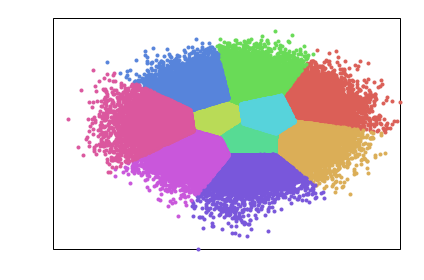

In [5]:
hyp.plot(list_of_arrays, '.', ndims=2, n_clusters=10)

## plotting all relations

#### this is done on the benchmark data and not the entire mit dwh

In [6]:
# get relations
all_rels = []
all_vecs = []
for relation in fabric.RE_C.keys():
    all_rels.append(relation)
    v = fabric.RE_C[relation]['vector']
    all_vecs.append(v)
all_rels = np.asarray(all_rels)
all_vecs = np.asarray(all_vecs)

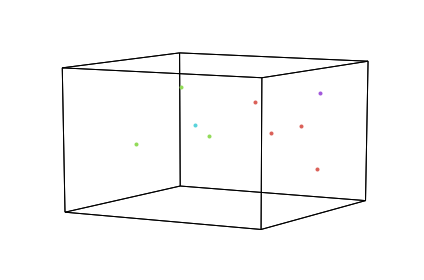

In [7]:
hyp.plot(all_vecs, '.', ndims=3, n_clusters=4)

## plotting all rows

In [25]:
# get rows
all_labels = []
all_rows = []
sampler = 0
last_relation = None
for vec, relation, row_idx in fabric.row_iterator_r():
    sampler += 1
    if sampler > 1000:
        if relation != last_relation:
            sampler = 0
            last_relation = relation
        continue
    else:
        last_relation = relation
    all_labels.append(relation)
    all_rows.append(vec)
all_rows = np.asarray(all_rows)
all_labels = np.asarray(all_labels)

In [27]:
for vec, relation, row_idx in fabric.row_iterator_r():
    if np.isnan(vec).any():
        print("Bad: " + str(row_idx))

Bad: 5744
Bad: 13306
Bad: 15078
Bad: 15325
Bad: 298
Bad: 546
Bad: 1199
Bad: 1570
Bad: 2804
Bad: 2864
Bad: 3625
Bad: 3664
Bad: 3789
Bad: 4037
Bad: 4774
Bad: 5744
Bad: 6295
Bad: 6394
Bad: 6403
Bad: 6889
Bad: 7028
Bad: 7733
Bad: 7919
Bad: 8004
Bad: 8077
Bad: 8253
Bad: 9390
Bad: 10215
Bad: 10618
Bad: 10959
Bad: 11337
Bad: 12160
Bad: 12582
Bad: 12652
Bad: 12752
Bad: 12776
Bad: 12923
Bad: 13306
Bad: 14288
Bad: 14593
Bad: 14692
Bad: 14836
Bad: 14838
Bad: 14854
Bad: 14882
Bad: 15078
Bad: 15280
Bad: 15312
Bad: 15325
Bad: 4774
Bad: 5744
Bad: 13306
Bad: 14838
Bad: 15078
Bad: 15325


In [26]:
hyp.plot(all_rows, '.', ndims=3, hue=all_labels)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

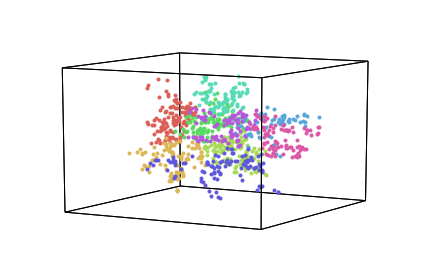

In [10]:
hyp.plot(all_rows, '.', ndims=2, n_clusters=9)

## plot all columns

In [19]:
# get rows
all_labels = []
all_cols = []
sampler = 0
last_relation = None
for vec, relation, col in fabric.column_iterator_c():
    all_labels.append(relation)
    all_cols.append(vec)
all_cols = np.asarray(all_cols)

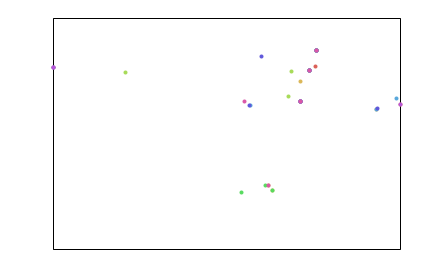

In [22]:
hyp.plot(all_cols, '.', ndims=2, hue=all_labels)